In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('20 Years world Population Dataset (2000-2020).csv')
df = df.replace(',','.', regex=True)
df.head()

,Unnamed: 0,Location,Time,PopMale,PopFemale,PopTotal,PopDensity
0,0,Afghanistan,2001,11117.754,10489.238,21606.992,33.096
1,1,Afghanistan,2002,11642.106,10958.668,22600.774,34.618
2,2,Afghanistan,2003,12214.634,11466.237,23680.871,36.273
3,3,Afghanistan,2004,12763.726,11962.963,24726.689,37.874
4,4,Afghanistan,2005,13239.684,12414.59,25654.274,39.295


In [3]:
popMaleBr = np.array(df[df["Location"] == "Brazil"]["PopMale"], float)*1000
popFemBr = np.array(df[df["Location"] == "Brazil"]["PopFemale"], float)*1000
popBr = np.array(df[df["Location"] == "Brazil"]["PopTotal"], float)*1000

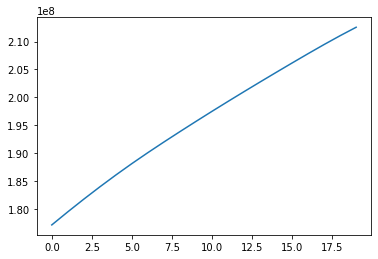

In [4]:
import matplotlib.pyplot as plt

plt.plot(popBr)
plt.show()

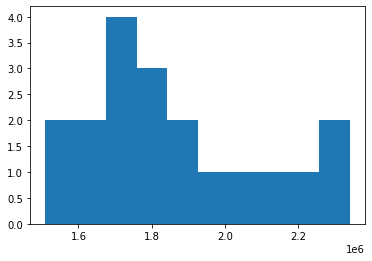

In [5]:
popBrInc = popBr[1:] -popBr[0:len(popBr)-1]
plt.hist(popBrInc)
plt.show()

In [8]:
popBrIncF = popFemBr[1:] - popFemBr[0:len(popFemBr)-1]
popBrIncM = popMaleBr[1:] - popMaleBr[0:len(popFemBr)-1]

In [34]:
from scipy.stats import t

delta = 0
n1 = len(popBrIncF)
n2 = len(popBrIncM)
s1 = np.std(popBrIncF)
s2 = np.std(popBrIncM)
x1m = np.mean(popBrIncF)
x2m = np.mean(popBrIncM)
df = n1 + n2 - 2

sp = np.sqrt(((n1 - 1)*s1**2 + (n2 - 1)*s2**2)/(n1 + n2))

tvalue = (x1m - x2m - delta)/(sp*np.sqrt(1/n1 + 1/n2))

pvalue = 2  - 2* t.cdf(tvalue, df)
print("DoF: ", df)
print("t-value: ", tvalue, " p-value", pvalue)

DoF:  36
t-value:  2.8430975654524455  p-value 0.0073176388580520335


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


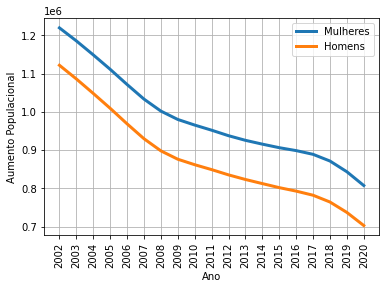

In [57]:
plt.plot(range(2002,2021), popBrIncF, linewidth = '3')
plt.plot(range(2002,2021), popBrIncM, linewidth = '3')
plt.xticks(range(2002,2021), rotation ='vertical')
plt.grid()
plt.xlabel("Ano")
plt.ylabel("Aumento Populacional")
plt.legend(["Mulheres", "Homens"])
plt.savefig('aumento.eps', format='eps')
plt.show()


20